In [46]:
#Importamos librerías
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Classification Iris dataset

A continuación vamos a proceder a trabajar con el dataset,iris. Este conjunto de datos contiene información sobre distintas característica de las distintas especies de la flor de iris. Para esto vamos a proceder en primer lugar a exportar este conjunto de datos que se encuentre en el repositorio sklearn.

In [3]:
#Extraemos del repositorio el conjunto de datos iris
iris = datasets.load_iris()
#Vemos el tipo de dato que es iris
type(iris)

sklearn.utils.Bunch

In [4]:
#Mostramos las claves del diccionario iris
print(iris.keys())

dict_keys(['DESCR', 'target_names', 'data', 'target', 'feature_names'])


Podemos ver que contamos con target que es la etiqueta a predecir, target_names que es el nombre de las etiquetas a predecir, data que son los datos, feature_names que son los nombres de las etiquetas de los datos.

In [5]:
#Mostramos la dimensión de nuestro conjunto de datos
iris.data.shape

(150, 4)

Podemos ver que tenemos un total de 150 observaciones y 4 variables (sin contar la etiqueta a predecir).

In [6]:
#Podemos mostrar los distintos nombres de las etiquetas a predecir así como sus valores
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

En este caso hemos asignado los valores 0 1 y 2 a las distintas especies a predecir. Las especies a predecir se pueden ver target_names.

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

Finalmente nos creamos un dataset que contiene los datos  y sus respectivos nombres

In [24]:
x = iris.data
y = iris.target
df = pd.DataFrame(x, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Ahora vamos a proceder a representar la matriz scatter para ver información importante sobre nuestro conjunto de datos. 

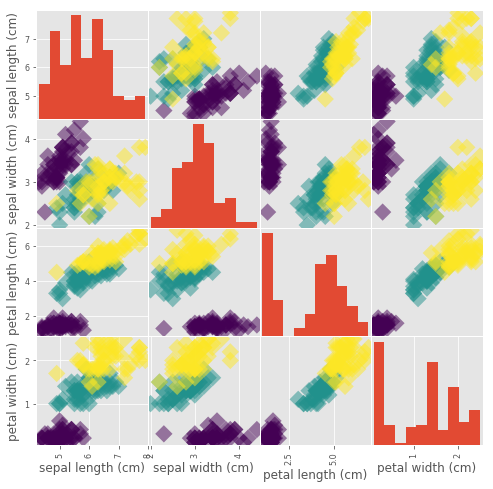

In [25]:
#Fijamos el estilo de visualización a ggplot
plt.style.use('ggplot')
#Representamos la matriz scatter
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8,8], s = 150, marker = 'D')
plt.show()

# Clasification house-votes-84

En este caso vamos trabajar con el conjunto de datos house-vores-84, el objetivo es predecir si el voto fue Republicano o Demócrata en función de determinados votos clave. El objetivo es comprender como entrenar y evaluar modelos de lenguaje supervisado.

In [21]:
#Obtenemos los datos
df = pd.read_csv('house-votes-84.csv')
#Visualizamos la cabecera de los datos
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigratio0,synfuels,education,superfund,crime,dutty_free_exports,eaa_rsa
0,republica0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republica0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [22]:
#Vemos información sobre el tipo de variables que contiene nuestro conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                 435 non-null object
infants               435 non-null int64
water                 435 non-null int64
budget                435 non-null int64
physician             435 non-null int64
salvador              435 non-null int64
religious             435 non-null int64
satellite             435 non-null int64
aid                   435 non-null int64
missile               435 non-null int64
immigratio0           435 non-null int64
synfuels              435 non-null int64
education             435 non-null int64
superfund             435 non-null int64
crime                 435 non-null int64
dutty_free_exports    435 non-null int64
eaa_rsa               435 non-null int64
dtypes: int64(16), object(1)
memory usage: 57.9+ KB


In [23]:
#Vemos un resumen estadístico de nuestros datos
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigratio0,synfuels,education,superfund,crime,dutty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.448276,0.581609,0.406897,0.487356,0.625287,0.549425,0.556322,0.475862,0.496552,0.344828,0.393103,0.480460,0.570115,0.400000,0.618391
std,0.495630,0.497890,0.493863,0.491821,0.500416,0.484606,0.498124,0.497390,0.499992,0.500564,0.475859,0.489002,0.500193,0.495630,0.490462,0.486341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


El siguiente paso consiste en visualizar nuestros datos para comprender mejor que datos tenemos y como se están comportando. En el ejercicio anterior (iris dataset) hicimos uso de scatter_matrix. A diferencia del conjunto anterior podemos observar que todas nuestras características son binarias, por lo que haremos uso de otro tipo de visualización que va bastante bien, que el seaborn countplot. A continuación vamos a crear un countplot para la característica educación.

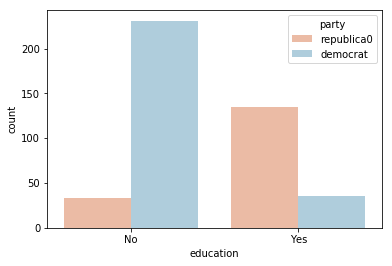

In [24]:
#Nos creamos el plot
plt.figure()
#La variable palette indicamos los colores en este caso indicamos rojo y azul
sns.countplot(x = 'education', hue = 'party', data = df, palette = 'RdBu')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Parece ser que los demócratas votaron rotundamente que no antes esta reforma, en comparación con los republicanos. Con este tipo de información nuestro  modelo de aprendizaje automático tratará de aprender cuando tratamos de predecir a que partido perteneció una persona basándonos en el comportamiento de su votación. A continuación vamos a realizar los mismos plots para satellite y para missile.

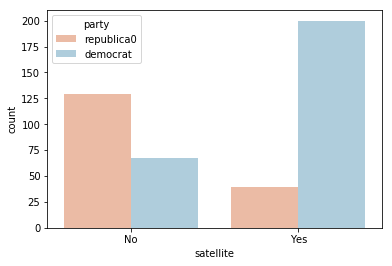

In [25]:
#Generamos el plot para satellite
plt.figure()
sns.countplot(x = 'satellite', hue = 'party', data = df, palette = 'RdBu')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

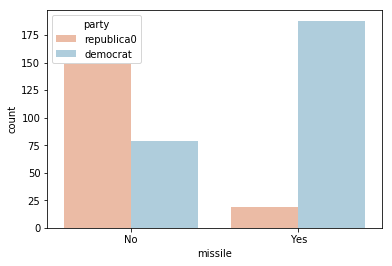

In [26]:
#Generamos el plot para missile
plt.figure()
sns.countplot(x = 'missile', hue = 'party', data = df, palette = 'RdBu')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# k-Nearest Neighbors: Fit

Una vez hemos explorado nuestros datos y tenemos una idea más clara de que información nos aporta cada variable, ha llegado el momento de construir nuestro clasificador. En este ejemplo, vamos a proceder a construir un clasificador de tipo KNN. Las características necesitan estar en un array de forma que cada fila sea una observación diferente. La variable a predecir debe de estar en una array aparte y debe de ser de igual dimensión que la array que contiene información sobre las características. Es muy importante saber, que nuestro conjunto de datos no puede contener valores nulos o NaN. Para crearnos una primera instancia de nuestro clasificador KNN debemos de seguir los siguientes pasos

In [27]:
#Creamos dos arrays una para las variables de entrada y otro para la variable a predecir
y = df['party'].values
x = df.drop('party', axis = 1).values
#Creamos un clasificador KNN con 6 vecinos
knn = KNeighborsClassifier(n_neighbors = 6)
#Fijamos el clasificador para los datos
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

Una vez tenemos nuestro clasificador fijado, podemos hacer uso de este para predecir la etiqueta de un conjunto de datos nuevos. Sin embargo podemos ver que no disponemos de datos sin etiqueta ya que usamos todos los datos para fijar el modelo. Podemos hacer uso del método predict() sobre los valores que usamos para ajustar el modelo, pero essto no es un buen indicador de la capacidad del modelo para generalizar datos nuevos, es decir, datos no vistos por el clasificador. Más adelante discutiremos como resolver este problema, mientras tanto vamos a partir de un nuevo etiquetado que se encuentra en la variable X_new.

In [42]:
#Nueva variable
x_new = [(0.216685,0.446375,0.747458,0.969955,0.39568,0.625329,0.637545,0.654156,0.735679,0.45885,0.140579
         ,0.222058,0.804356,0.281388,0.927544,0.907234)]
df_new = pd.DataFrame(x_new)
#Creamos el conjunto de arrays
y = df['party'].values
x = df.drop('party', axis = 1).values
#Nos creamos el clasificador
knn = KNeighborsClassifier(n_neighbors = 6)
#Fijamos el clasificador
knn.fit(x, y)
#Predecimos para los datos fijados 
y_pred = knn.predict(x)
#Predecimos para la nueva instancia
new_prediction = knn.predict(df_new)
#Mostramos el nuevo nivel predicho 
print('Prediction: {}'.format(new_prediction))

Prediction: ['democrat']


Hasta ahora hemos usado la clasificación en problemas binarios, estos problemas eran aquellos que teníamos dos posibles etiquetas a clasificar (0 y 1). Sin embargo, estos problemas pueden ser también usado en caso de problemas de clasificación multivariable, es decir, problemas con más de 2 etiquetas a clasificar. A continuación vamos hacer uso de una muestra del conjunto de datos MNIST, esta base de datos contiene números del 0 al 9, cada número es una matriz de 0 y 1 y se trata de clasificar estos números de forma adecuada.

In [43]:
#Importamos del repositorio sklearn la base de datos MNIST
digits = datasets.load_digits()
#Mostramos las claves de nuestro conjunto de datos y el DESCR
print(digits.keys())
print(digits.DESCR)

dict_keys(['DESCR', 'target_names', 'images', 'data', 'target'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [44]:
#Mostramos el tamaño de las claves images y data
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


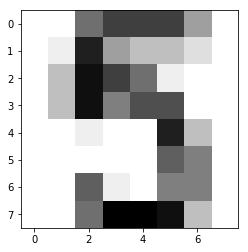

In [45]:
#Mostramos el dígito 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Como ya sabemos a la hora de realizar un algoritmo es muy importante splittear nuestra base de datos en train&test. De esta forma podremos evaluar la precisión de nuestro algoritmo.

In [47]:
#Obtenemos los datos
x = digits.data
y = digits.target
#Spliteamos los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)
#Nos creamos nuestro clasificador Knn con 7 vecinos 
knn = KNeighborsClassifier(n_neighbors = 7)
#Fijamos el modelo
knn.fit(x_train, y_train)
#Vemos la precisión de nuestro modelo 
print(knn.score(x_test, y_test))

0.983333333333


Cuando estamos entrenando un algoritmo a partir de datos para los cuales conocemos el resultado esperado, si este algoritmo es sobreentrenado puede ser que nuestro algoritmo generalice demasiado ante el conjunto de datos usados para su entrenamiento y no se adapte ante situaciones nuevas, esto en machine learning es conocido como overfitting.
Otro de las situaciones que se puede dar es la contraria, es decir, que no entrenemos el modelo con los datos suficientes y este no se de adapte de forma adecuada, esto es lo que se conoce como underfitting.

Para el caso de knn es posible que el aumentar el número de vecinos nos conlleve a una frontera de decisión que generalice demasiado y caigamos en el problema del overfitting y en caso de seleccionar un número de vecinos no adeacuado caigamos en el problema de underfitting. A continuación se va a proceder a mostrar un ejemplo.

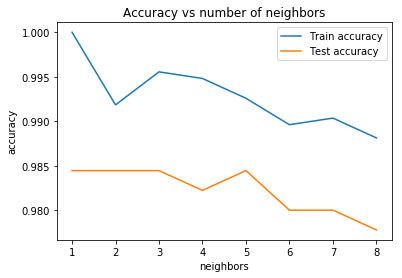

In [59]:
#Spliteamos los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, stratify = y)
#Nos creamos un conjunto de arrays de vecinos y donde almacenamos los resultados de la precisión en train y test
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Creamos un bucle que nos calculará la precisión en train y test para un número determinado de vecinos
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

plt.plot(neighbors, train_accuracy, label = 'Train accuracy')
plt.plot(neighbors, test_accuracy, label = 'Test accuracy')
plt.title('Accuracy vs number of neighbors')
plt.legend()
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.show()

Podemos ver como los mejores resultados se da con 5 para el caso del test, para el caso del train el mejor resultado es para 3 vecinos. A partir de 5 vecinos podemos ver como se produce underfitting en los datos. Finalmente se trata de elegir un valor de k que mantenga un equilibrio entre ambos resultados.